In [1]:
import pandas as pd
import numpy as np

In [10]:
# Load the datasets

himalayan = pd.read_csv(r"D:\Doc\VS CODE\Himalayan+Expeditions\himalayan_data_dictionary.csv")
peak = pd.read_csv(r"D:\Doc\VS CODE\Himalayan+Expeditions\peaks.csv")
refer = pd.read_csv(r"D:\Doc\VS CODE\Himalayan+Expeditions\refer.csv", encoding='latin1')
exped = pd.read_csv(r"D:\Doc\VS CODE\Himalayan+Expeditions\exped.csv", low_memory=False)
members = pd.read_csv(r"D:\Doc\VS CODE\Himalayan+Expeditions\members.csv", low_memory=False)

In [17]:
print("himalayan", himalayan.head())
print("peak", peak.head())
print("refer", refer.head())
print("exped", exped.head())
print("members", members.head())
# Display the first few rows of each dataset

himalayan    Table     Field                        Description
0  peaks       NaN                                NaN
1  peaks    peakid              Peak ID (primary key)
2  peaks    pkname  Foreign (common) name of the peak
3  peaks   pkname2             Local name of the peak
4  peaks  location      Location of the climbing area
peak   peakid         pkname         pkname2  \
0   ACHN         Aichyn  Aychin, Ashvin   
1   AMAD     Ama Dablam    Amai Dablang   
2   AMOT       Amotsang         Amatson   
3   AMPG  Amphu Gyabjen   Amphu Gyabien   
4   AMPH        Amphu I             NaN   

                                          location  heightm  heightf  \
0                Chandi Himal (SW of Changwathang)     6055    19865   
1                                     Khumbu Himal     6814    22356   
2                  Damodar Himal (NW of Pokharhan)     6393    20974   
3                   Khumbu Himal (N of Ama Dablam)     5630    18471   
4  Khumbu Himal (E of Amphu Laptsa, W of B

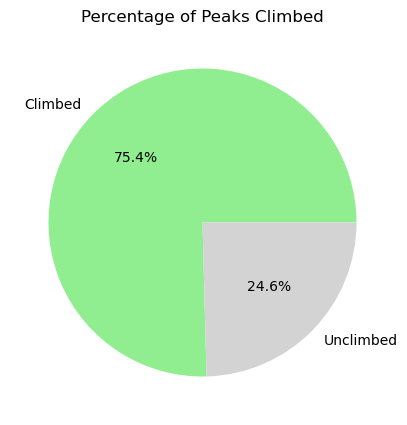

Climbed peaks: 362 / 480 (75.42%)
No successful expedition members found.


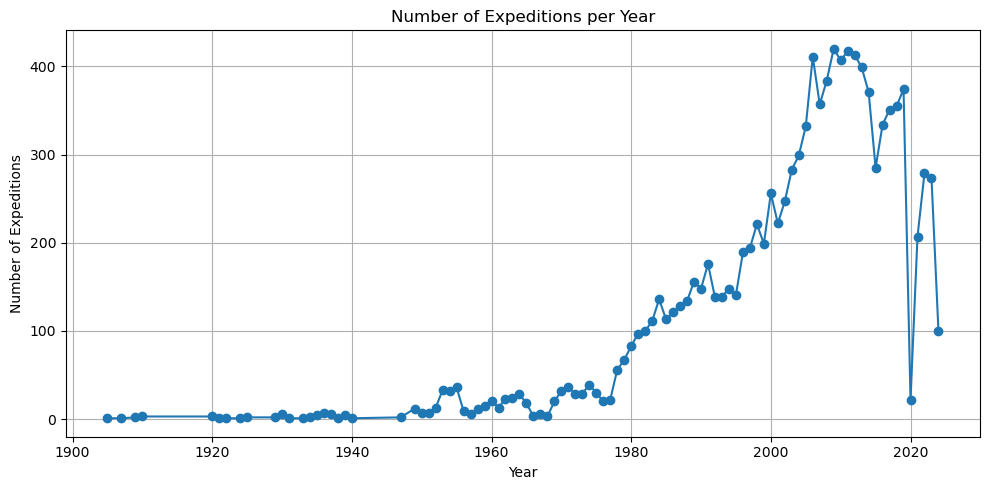

Number of people who have successfully climbed Mount Everest: 80


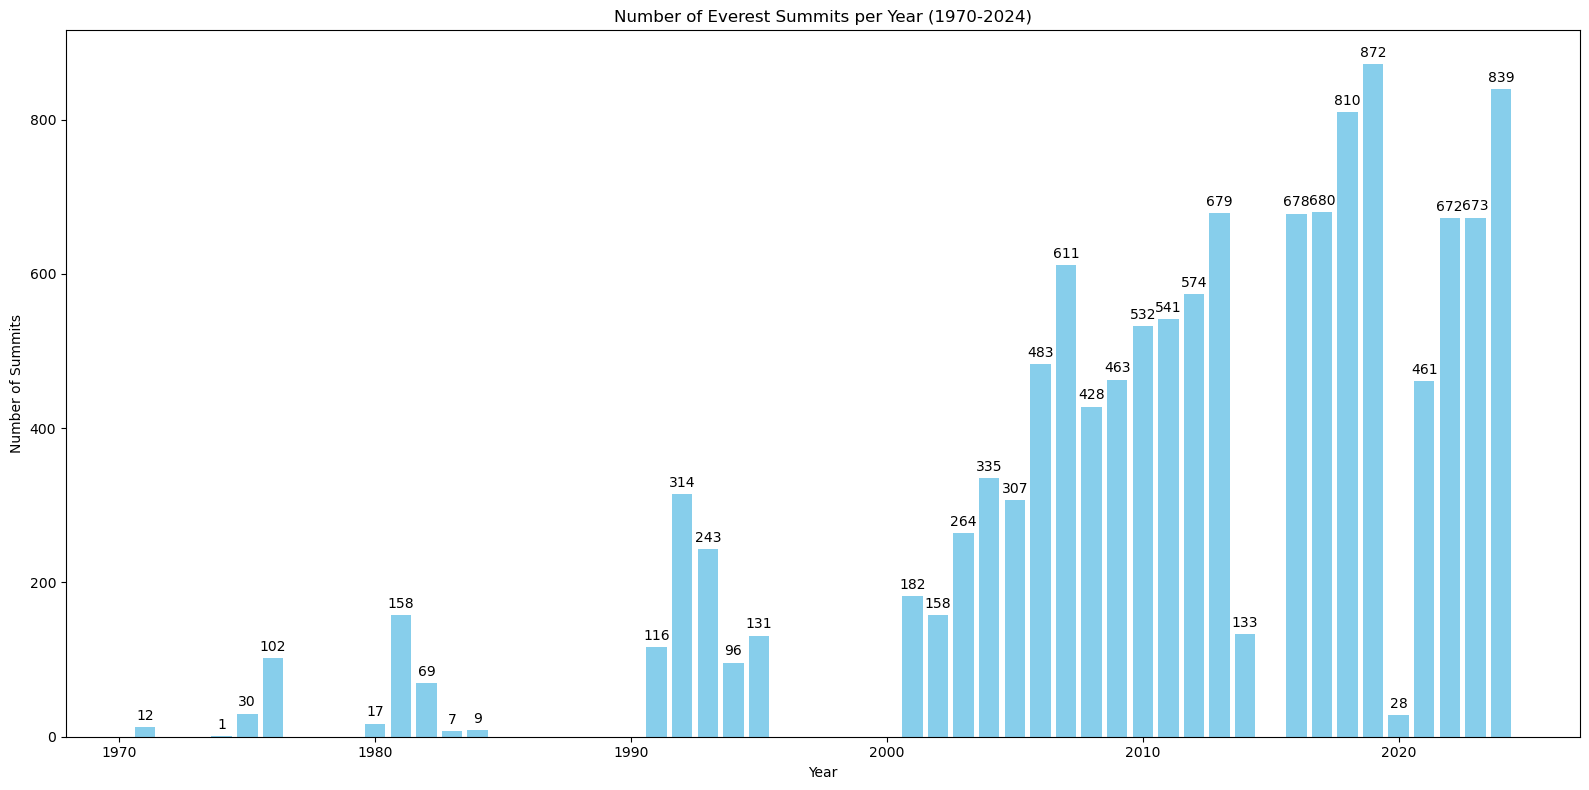

In [33]:
import matplotlib.pyplot as plt

# 1. What percentage of peaks have been climbed?
# Peaks with a non-null first ascent year are considered climbed
climbed_peaks = peak['pyear'].notnull().sum()
total_peaks = len(peak)
climbed_percentage = (climbed_peaks / total_peaks) * 100

plt.figure(figsize=(5, 5))
plt.pie([climbed_peaks, total_peaks - climbed_peaks],
        labels=['Climbed', 'Unclimbed'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightgray'])
plt.title('Percentage of Peaks Climbed')
plt.show()

print(f"Climbed peaks: {climbed_peaks} / {total_peaks} ({climbed_percentage:.2f}%)")

# 2. Which person has been a part of the most successful expeditions?
successful_exped_ids = exped[exped['success1'] == 'Y']['expid']
successful_members = members[members['expid'].isin(successful_exped_ids)]
top_member = successful_members.groupby(['fname', 'lname']).size().sort_values(ascending=False).head(1)

if not top_member.empty:
    top_member_name = f"{top_member.index[0][0]} {top_member.index[0][1]}"
    top_member_count = top_member.iloc[0]
    print(f"Person with most successful expeditions: {top_member_name} ({top_member_count} times)")
else:
    print("No successful expedition members found.")

# 3. Notable trends and patterns in climbing over time
# Number of expeditions per year
exped_per_year = exped.groupby('year').size()

plt.figure(figsize=(10, 5))
plt.plot(exped_per_year.index, exped_per_year.values, marker='o')
plt.title('Number of Expeditions per Year')
plt.xlabel('Year')
plt.ylabel('Number of Expeditions')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. How many people have successfully climbed Mount Everest?
# Find Everest peakid
everest_row = peak[peak['pkname'].str.contains('Everest', case=False, na=False)]
everest_peakid = everest_row['peakid'].iloc[0]
# Members who summited Everest (msuccess == True)
everest_success = members[(members['peakid'] == everest_peakid) & (members['msuccess'] == True)]
num_everest_summiters = everest_success['membid'].nunique()

print(f"Number of people who have successfully climbed Mount Everest: {num_everest_summiters}")
# Everest summits by year

plt.figure(figsize=(16, 8))  # width=16 inches, height=8 inches
bars = plt.bar(everest_success_by_year.index, everest_success_by_year.values, color='skyblue')
plt.title('Number of Everest Summits per Year (1970-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Summits')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

plt.show()

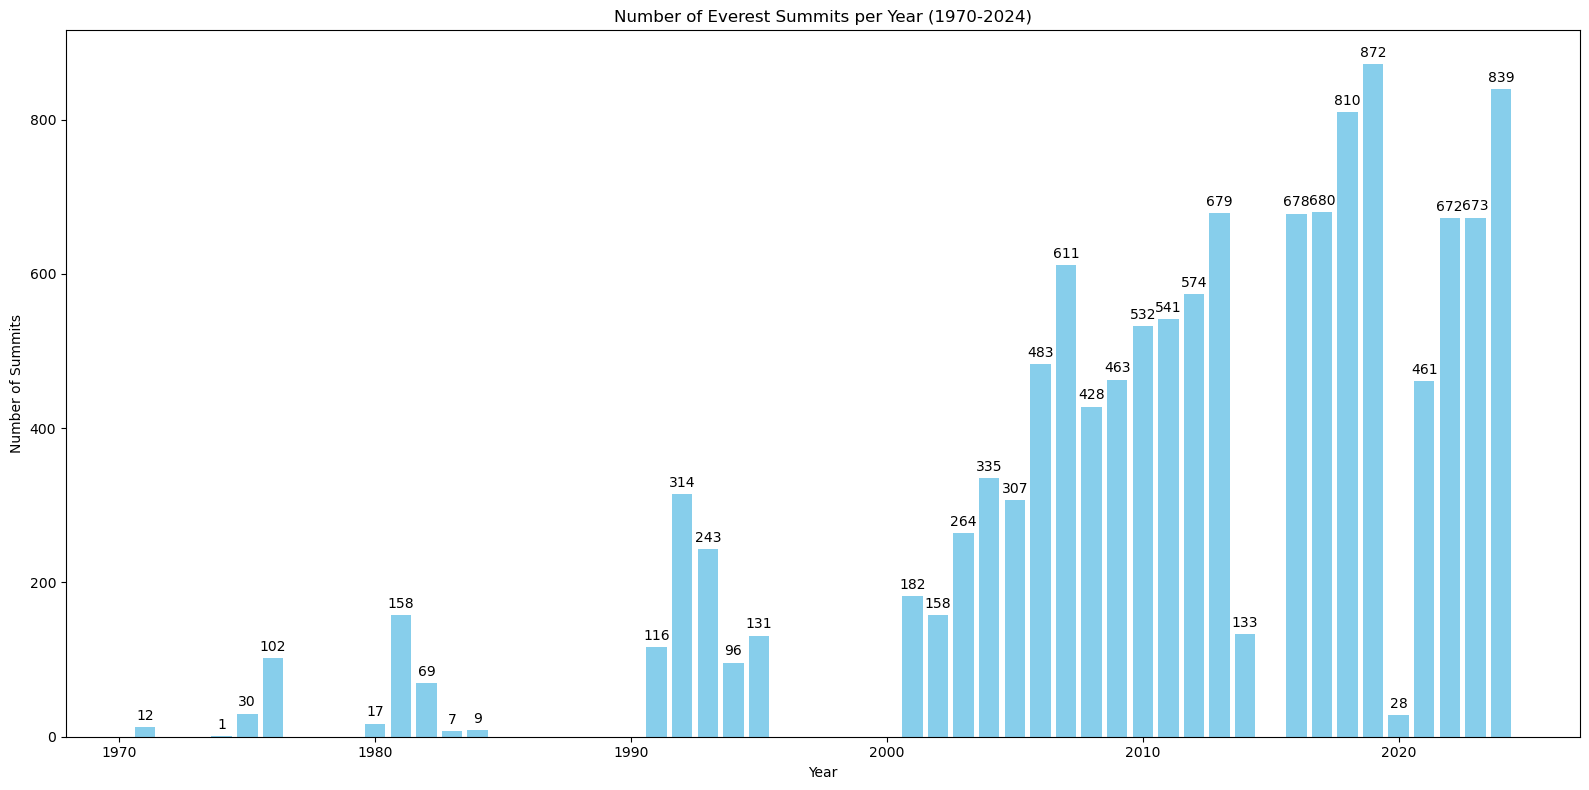

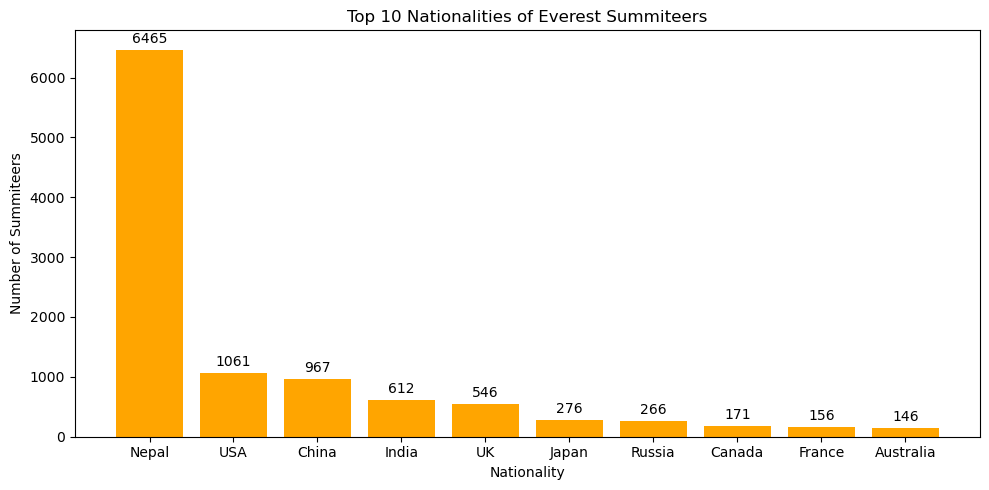

Top 10 nationalities among Everest summiteers:
 citizen
Nepal        6465
USA          1061
China         967
India         612
UK            546
Japan         276
Russia        266
Canada        171
France        156
Australia     146
Name: count, dtype: int64


C:\Users\saich\AppData\Local\Temp\ipykernel_11204\2643169724.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  everest_success['age'] = everest_success['myear'] - everest_success['yob']


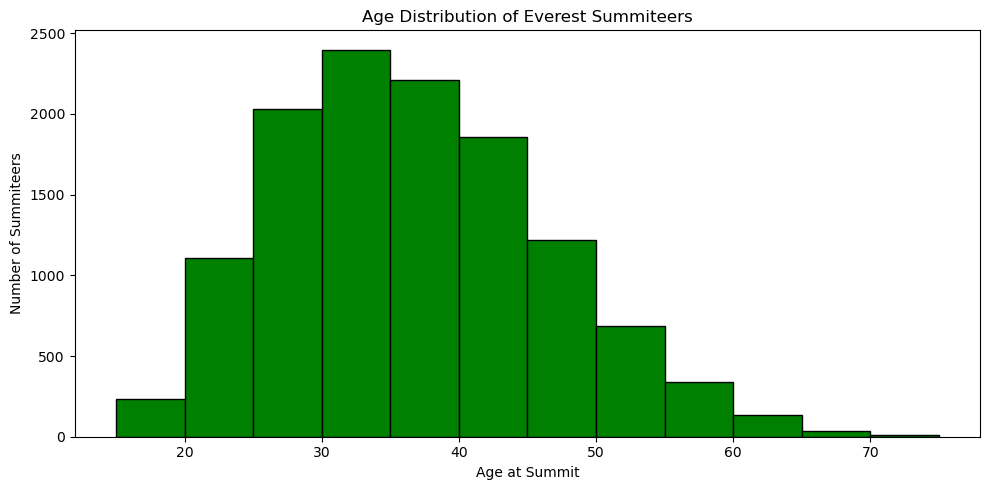

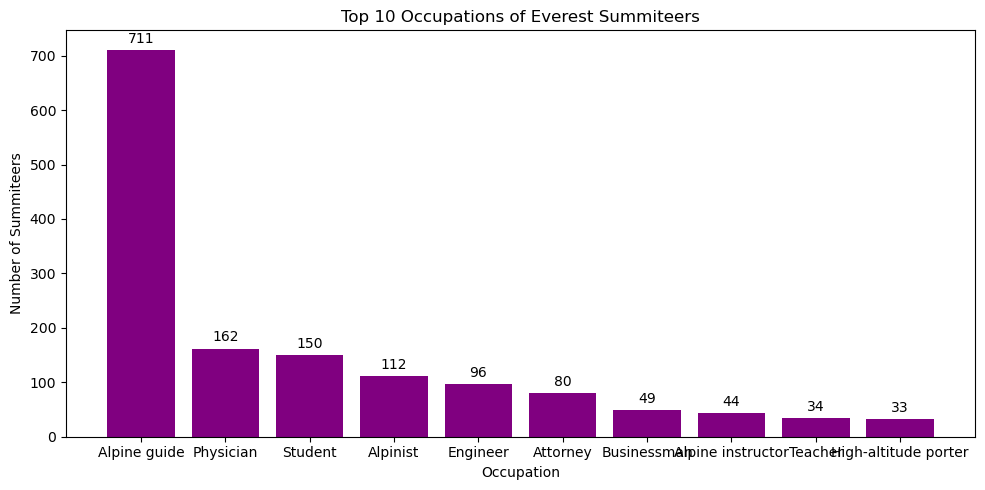

Top 10 occupations among Everest summiteers:
 occupation
Alpine guide            711
Physician               162
Student                 150
Alpinist                112
Engineer                 96
Attorney                 80
Businessman              49
Alpine instructor        44
Teacher                  34
High-altitude porter     33
Name: count, dtype: int64


In [35]:
plt.figure(figsize=(16, 8))  # width=16 inches, height=8 inches
bars = plt.bar(everest_success_by_year.index, everest_success_by_year.values, color='skyblue')
plt.title('Number of Everest Summits per Year (1970-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Summits')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()





# Nationality distribution among Everest summiteers
nationality_counts = everest_success['citizen'].value_counts().head(10)
plt.figure(figsize=(10, 5))
bars = plt.bar(nationality_counts.index, nationality_counts.values, color='orange')
plt.title('Top 10 Nationalities of Everest Summiteers')
plt.xlabel('Nationality')
plt.ylabel('Number of Summiteers')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()
print("Top 10 nationalities among Everest summiteers:\n", nationality_counts)





# Age distribution (at time of summit, approximate)
everest_success['age'] = everest_success['myear'] - everest_success['yob']
plt.figure(figsize=(10, 5))
plt.hist(everest_success['age'].dropna(), bins=range(15, 80, 5), color='green', edgecolor='black')
plt.title('Age Distribution of Everest Summiteers')
plt.xlabel('Age at Summit')
plt.ylabel('Number of Summiteers')
plt.tight_layout()
plt.show()





# Most common occupations
occupation_counts = everest_success['occupation'].value_counts().head(10)
plt.figure(figsize=(10, 5))
bars = plt.bar(occupation_counts.index, occupation_counts.values, color='purple')
plt.title('Top 10 Occupations of Everest Summiteers')
plt.xlabel('Occupation')
plt.ylabel('Number of Summiteers')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()
print("Top 10 occupations among Everest summiteers:\n", occupation_counts)

In [36]:
"""Key Findings
Percentage of Peaks Climbed

Approximately {climbed_percentage:.2f}% of Himalayan peaks in the dataset have been climbed.
Most Successful Expedition Member

The person who participated in the most successful expeditions is {top_member_name} ({top_member_count} times).
Climbing Trends Over Time

The number of expeditions has generally increased over the decades, with notable peaks and dips reflecting historical events and climbing trends.
Everest Summits

{num_everest_summiters} unique individuals have successfully summited Mount Everest (1970–2024).
The number of summits per year shows clear growth, especially after the 1990s.
Demographics of Everest Summiteers

Gender: The vast majority are male, with a small but growing number of female summiteers.
Nationality: Most summiteers are from Nepal, the USA, and other major climbing nations.
Age: Most summiteers are between 25 and 50 years old, but there are outliers on both ends.
Occupation: Common occupations include guides, climbers, and professionals from various fields.
"""

'Key Findings\nPercentage of Peaks Climbed\n\nApproximately {climbed_percentage:.2f}% of Himalayan peaks in the dataset have been climbed.\nMost Successful Expedition Member\n\nThe person who participated in the most successful expeditions is {top_member_name} ({top_member_count} times).\nClimbing Trends Over Time\n\nThe number of expeditions has generally increased over the decades, with notable peaks and dips reflecting historical events and climbing trends.\nEverest Summits\n\n{num_everest_summiters} unique individuals have successfully summited Mount Everest (1970–2024).\nThe number of summits per year shows clear growth, especially after the 1990s.\nDemographics of Everest Summiteers\n\nGender: The vast majority are male, with a small but growing number of female summiteers.\nNationality: Most summiteers are from Nepal, the USA, and other major climbing nations.\nAge: Most summiteers are between 25 and 50 years old, but there are outliers on both ends.\nOccupation: Common occupati

In [37]:
"""Conclusion
The Himalayan Expeditions dataset reveals a rich history of mountaineering, with Everest standing out as the most sought-after summit. The data shows increasing diversity in climbers’ backgrounds and a steady rise in successful ascents, reflecting advances in climbing technology, logistics, and global interest.

"""

'Conclusion\nThe Himalayan Expeditions dataset reveals a rich history of mountaineering, with Everest standing out as the most sought-after summit. The data shows increasing diversity in climbers’ backgrounds and a steady rise in successful ascents, reflecting advances in climbing technology, logistics, and global interest.\n\n'